In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


In [2]:
#Reading data
df = pd.read_csv("project_1.csv")

In [3]:
df.shape

(27374, 12)

# Understanding the Features

In [4]:
df.head()

,time,TREFMXAV_U,FLNS,FSNS,PRECT,PRSN,QBOT,TREFHT,UBOT,VBOT,lat,lon
0,2006-01-02 00:00:00,282.77585,41.925180,25.926952,4.663135e-09,4.781004e-17,0.004769,279.14288,3.878579,1.394184,53.246075,357.5
1,2006-01-03 00:00:00,284.47113,8.905806,10.946910,8.046593e-08,1.295726e-16,0.006271,281.14865,1.788157,3.821703,53.246075,357.5
2,2006-01-04 00:00:00,284.28796,16.511415,6.405902,2.910936e-09,4.094447e-16,0.005782,281.22380,0.804845,-2.299140,53.246075,357.5
3,2006-01-05 00:00:00,282.12110,29.948362,9.315041,7.432505e-11,0.000000e+00,0.004277,278.39767,-1.100267,-1.258029,53.246075,357.5
4,2006-01-06 00:00:00,280.89090,19.064156,7.941241,6.894238e-12,0.000000e+00,0.003990,278.06378,-0.706321,-0.938421,53.246075,357.5


TREFMXAV_U = Urban daily maximum of average 2-m temperature
FLNS = Net longwave flux at surface
FSNS = Net solar flux at surface
PRECT =	Total (convective and large-scale) precipitation rate (liq + ice)
PRSN = Snow precipitation rate
QBOT = 	Lowest model level water vapor mixing ratio
TREFHT = Reference height temperature
UBOT = 	Lowest model level zonal wind (m/s)
VBOT = 	Lowest model level meridional wind (m/s)
lat = latitude
lon = longitude

In [6]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27374 entries, 0 to 27373
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        27374 non-null  object 
 1   TREFMXAV_U  27374 non-null  float64
 2   FLNS        27374 non-null  float64
 3   FSNS        27374 non-null  float64
 4   PRECT       27374 non-null  float64
 5   PRSN        27374 non-null  float64
 6   QBOT        27374 non-null  float64
 7   TREFHT      27374 non-null  float64
 8   UBOT        27374 non-null  float64
 9   VBOT        27374 non-null  float64
 10  lat         27374 non-null  float64
 11  lon         27374 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.5+ MB


In [7]:
#changing the time format
df['time'] = pd.to_datetime(df['time'])

In [8]:
#checking for missing values
df.isnull().any()

time          False
TREFMXAV_U    False
FLNS          False
FSNS          False
PRECT         False
PRSN          False
QBOT          False
TREFHT        False
UBOT          False
VBOT          False
lat           False
lon           False
dtype: bool

In [10]:
#copying the data
df_1 = df.copy()

# Decomposing Time

In [11]:
#year
df_1['year'] = df['time'].dt.year
#month
df_1['month'] = df['time'].dt.month
#week, isocalendar is used for standardization and consistency
df_1['week'] = df['time'].dt.isocalendar().week
#day
df_1['day'] = df['time'].dt.day
#hour
df_1['hour'] = df['time'].dt.hour
#min
df_1['min'] = df['time'].dt.minute
#second
df_1['sec'] = df['time'].dt.second

In [12]:
#checking the time range
df_1['year'].max()

2080

In [13]:
df_1['year'].min()

2006

In [14]:
df_1['hour'].max()

0

# Anomaly Detection

In [15]:
#descriptive statistics
df_1.describe()

,TREFMXAV_U,FLNS,FSNS,PRECT,PRSN,QBOT,TREFHT,UBOT,VBOT,lat,lon,year,month,week,day,hour,min,sec
count,27374.000000,27374.000000,27374.000000,2.737400e+04,2.737400e+04,27374.000000,27374.000000,27374.000000,27374.000000,2.737400e+04,27374.0,27374.000000,27374.000000,27374.0,27374.000000,27374.0,27374.0,27374.0
mean,288.836179,42.995679,97.026261,3.379697e-08,3.049825e-10,0.006523,284.876413,1.176320,1.503084,5.324608e+01,357.5,2043.001352,6.526229,26.598378,15.721086,0.0,0.0,0.0
std,5.246468,21.451927,75.062880,4.986518e-08,4.706017e-09,0.002126,4.992277,3.066843,2.940138,1.659148e-11,0.0,21.648346,3.447815,15.060184,8.796118,0.0,0.0,0.0
min,274.153200,0.611385,2.819259,-4.671764e-28,-6.256338e-21,0.001855,268.938400,-9.739025,-8.991429,5.324607e+01,357.5,2006.000000,1.000000,1.0,1.000000,0.0,0.0,0.0
25%,284.719465,26.157544,31.037187,2.131118e-09,0.000000e+00,0.004860,280.987885,-1.085982,-0.766405,5.324607e+01,357.5,2024.000000,4.000000,14.0,8.000000,0.0,0.0,0.0
50%,288.299895,40.777005,78.443183,1.311730e-08,1.206375e-21,0.006211,284.537575,1.488009,1.593354,5.324607e+01,357.5,2043.000000,7.000000,27.0,16.000000,0.0,0.0,0.0
75%,292.869525,57.113572,149.332133,4.637272e-08,2.348279e-16,0.007947,288.900110,3.390555,3.634500,5.324607e+01,357.5,2062.000000,10.000000,40.0,23.000000,0.0,0.0,0.0
max,311.257260,111.851400,310.191700,7.752961e-07,2.332090e-07,0.015222,303.117980,10.234506,11.178102,5.324607e+01,357.5,2080.000000,12.000000,53.0,31.000000,0.0,0.0,0.0


Points from the descriptive stats table:
1. no negative FSNS, which means no net loss of solar energy
2. PRSN has a negative minimum value, which can be a source of error
3. PRECT also has negative minimum value, which can be a source of error
3. Reference height temperature has min value -4.25 degree celsius and max value 29.85 degree celsius
4. Urban temperature has min value 0.85 degree celsius, and max value 38.108 degree celsius
5. same latitude and longitude, but longitude value is not accurate
6. no entries for hour, min and sec

In [16]:
#there are no entries for hour, min, sec, hence, dropping them
df_1.drop(['hour', 'min', 'sec'], axis=1, inplace=True)

In [17]:
#using boolean indexing for getting no. of PRSN values above the freezing temp
temp_grtr_273 = df_1[df_1['TREFMXAV_U'] > 273.15]['PRSN'].count()

#using boolean indexing for getting no. of PRSN values below and equal to the freezing temp
temp_below_273 = df_1[df_1['TREFMXAV_U'] <= 273.15]['PRSN'].count()

print("No. of values that are associated with temp above 273.15 Kelvin:", temp_grtr_273)
print("No of values that are associated with temp below or equal to 273.15 Kelvin:", temp_below_273)

No. of values that are associated with temp above 273.15 Kelvin: 27374
No of values that are associated with temp below or equal to 273.15 Kelvin: 0


In [18]:
#this is done using the ref height temp
#using boolean indexing for getting no. of PRSN values above the freezing temp
temp_grtr_273_1 = df_1[df_1['TREFHT'] > 273.15]['PRSN'].count()

#using boolean indexing for getting no. of PRSN values below and equal to the freezing temp
temp_below_273_1 = df_1[df_1['TREFHT'] <= 273.15]['PRSN'].count()

print("No. of values that are associated with temp above 273.15 Kelvin:", temp_grtr_273_1)
print("No of values that are associated with temp below or equal to 273.15 Kelvin:", temp_below_273_1)

No. of values that are associated with temp above 273.15 Kelvin: 27300
No of values that are associated with temp below or equal to 273.15 Kelvin: 74


In [19]:
#checking whether the PRSN values are associated with values close to the freezing temp
#using the reference height temperature
count_above_275_1 = df_1[df_1['TREFHT'] > 275]['PRSN'].count()
count_below_275_1 = df_1[df_1['TREFHT'] <= 275]['PRSN'].count()

print("Number of PRSN values associated with temperature above 275 Kelvin:", count_above_275_1)
print("Number of PRSN values associated with temperature below or equal to 275 Kelvin:", count_below_275_1)

Number of PRSN values associated with temperature above 275 Kelvin: 26995
Number of PRSN values associated with temperature below or equal to 275 Kelvin: 379


In [20]:
#using the urban maximum temp
count_above_275 = df_1[df_1['TREFMXAV_U'] > 275]['PRSN'].count()
count_below_275 = df_1[df_1['TREFMXAV_U'] <= 275]['PRSN'].count()

print("Number of PRSN values associated with temperature above 275 Kelvin:", count_above_275)
print("Number of PRSN values associated with temperature below or equal to 275 Kelvin:", count_below_275)

Number of PRSN values associated with temperature above 275 Kelvin: 27367
Number of PRSN values associated with temperature below or equal to 275 Kelvin: 7


With Urban Maximum Temperature - there are no PRSN values associated with temperature below or equal to 273.15 Kelvin and 7 values associated with temp less than or equal to 275.
With reference height temperature there are 74 values associated with temperature below and equal to 273.15 Kelvin and 379 values associated with temp below or equal to 275.

# Adding Seasonality to the dataset

In [22]:
#mapping Dec,Jan,Feb as winter, March,April, May as Spring, June,July,Aug as Summer and September, Oct and Nov as Fall
season = df_1['month'].map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})
#converting the categorical variables into numerical variables
season_to_numerical = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}

df_1['season_enc'] = season.map(season_to_numerical)

# Temporal Analysis

TREFMXAV_U:

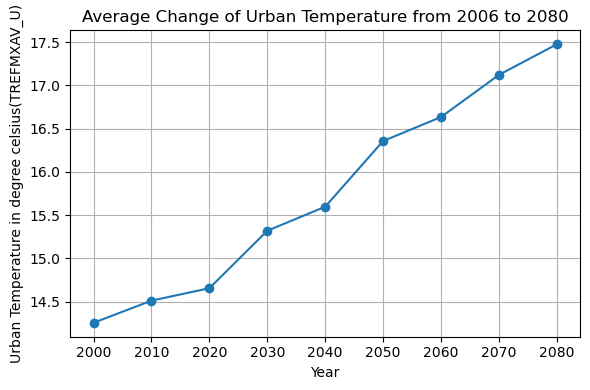

In [23]:
#visualizing the mean urban temperature trend in every 10 years time
#floor division of the year to get the quotient and then again multiplying by 10 to get the actual year/decade
grouping_in_decade = df_1.groupby(df_1['year'] // 10 * 10)['TREFMXAV_U'].mean()
#converting the temperature into celsius from Kelvin
df_decade_celsius = grouping_in_decade - 273.15

# Plotting the change in temp in every decade 
plt.figure(figsize=(6, 4))
plt.plot(grouping_in_decade.index, df_decade_celsius.values, marker='o', linestyle='-')
plt.title('Average Change of Urban Temperature from 2006 to 2080')
#year
plt.xlabel('Year')
#temp in celsius
plt.ylabel('Urban Temperature in degree celsius(TREFMXAV_U)')
plt.grid(True)
plt.xticks(grouping_in_decade.index) 
plt.tight_layout()
plt.show()

The overall trend is increasing. The highest rate of change is seen from 2040 to 2050, followed by 2020 to 2030. The mean temp is anticipated to reach 17.5 from 14.2 in 2006.

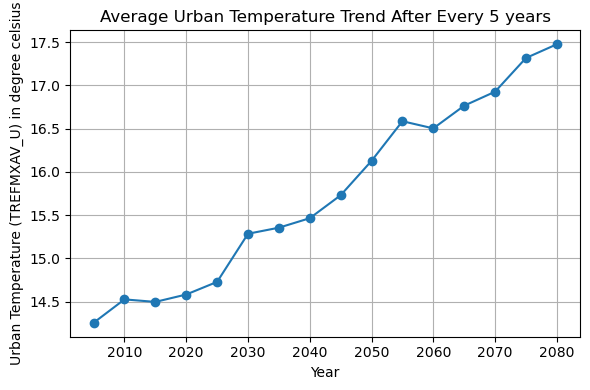

In [24]:
grouping_freq5_mean = df_1.groupby(df_1['year'] // 5 * 5)['TREFMXAV_U'].mean()

#converting Kelvin to celsius
df_freq5_celsius = grouping_freq5_mean - 273.15

# plotting
plt.figure(figsize=(6, 4))
plt.plot(df_freq5_celsius.index, df_freq5_celsius.values, marker='o', linestyle='-')
plt.title('Average Urban Temperature Trend After Every 5 years')
plt.xlabel('Year')
plt.ylabel('Urban Temperature (TREFMXAV_U) in degree celsius')
plt.grid(True)
plt.tight_layout()
plt.show()

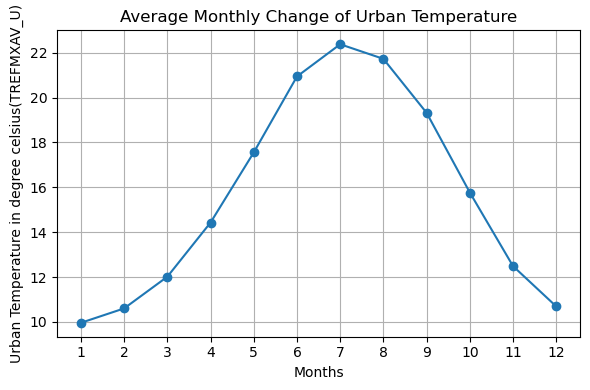

In [26]:
grouping_in_months_mean = df_1.groupby(df_1['month'])['TREFMXAV_U'].mean()
#converting the temperature into celsius from Kelvin
df_months_celsius = grouping_in_months_mean - 273.15

# Plotting the change in temp in every decade 
plt.figure(figsize=(6, 4))
plt.plot(grouping_in_months_mean.index, df_months_celsius.values, marker='o', linestyle='-')
plt.title('Average Monthly Change of Urban Temperature')
#season
plt.xlabel('Months')
#temp in celsius
plt.ylabel('Urban Temperature in degree celsius(TREFMXAV_U)')
plt.grid(True)
plt.xticks(grouping_in_months_mean.index) 
plt.tight_layout()
plt.show()

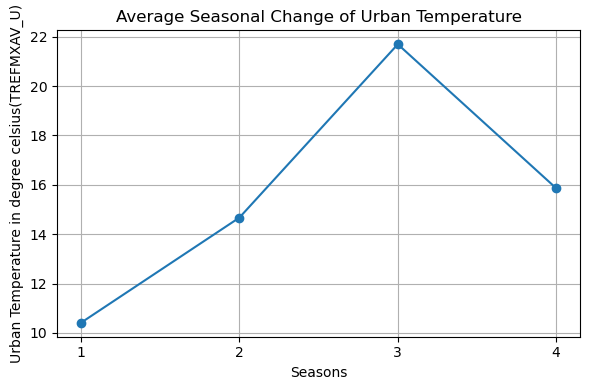

In [27]:
grouping_in_szn_mean = df_1.groupby(df_1['season_enc'])['TREFMXAV_U'].mean()
#converting the temperature into celsius from Kelvin
df_szn_celsius = grouping_in_szn_mean - 273.15

# Plotting the change in temp in every decade 
plt.figure(figsize=(6, 4))
plt.plot(grouping_in_szn_mean.index, df_szn_celsius.values, marker='o', linestyle='-')
plt.title('Average Seasonal Change of Urban Temperature')
#season
plt.xlabel('Seasons')
#temp in celsius
plt.ylabel('Urban Temperature in degree celsius(TREFMXAV_U)')
plt.grid(True)
plt.xticks(grouping_in_szn_mean.index) 
plt.tight_layout()
plt.show()

In [30]:
max_temp_2080 = df_1[df_1['year'] == 2080]['TREFMXAV_U'].max()

print("Maximum temperature for the year 2080:", max_temp_2080)

Maximum temperature for the year 2080: 304.3757


TREFHT - Reference Height Temp

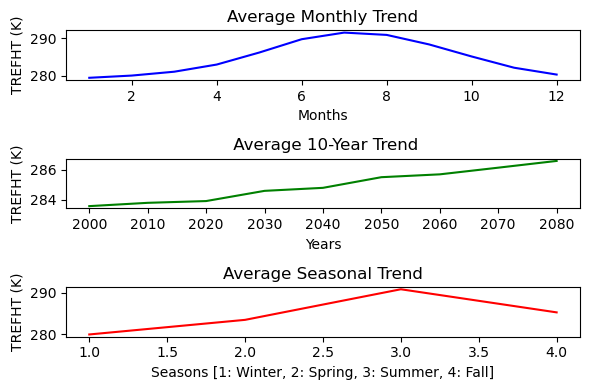

In [28]:
grouping_trefht_decade = df_1.groupby(df_1['year'] // 10 * 10)['TREFHT'].mean()
grouping_trefht_months_mean = df_1.groupby(df_1['month'])['TREFHT'].mean()
grouping_trefht_szn_mean = df_1.groupby(df_1['season_enc'])['TREFHT'].mean()

# Create a figure and axes for subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 4))

# Plot monthly trend
axs[0].plot(grouping_trefht_months_mean.index, grouping_trefht_months_mean.values, color='blue')
axs[0].set_title('Average Monthly Trend')
axs[0].set_ylabel('TREFHT (K)')
axs[0].set_xlabel('Months')

# Plot 10-year trend
axs[1].plot(grouping_trefht_decade.index, grouping_trefht_decade.values, color='green')
axs[1].set_title(' Average 10-Year Trend')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('TREFHT (K)')

# Plot seasonal trend
axs[2].plot(grouping_trefht_szn_mean.index, grouping_trefht_szn_mean.values, color='red')
axs[2].set_title('Average Seasonal Trend')
axs[2].set_xlabel('Seasons [1: Winter, 2: Spring, 3: Summer, 4: Fall]')
axs[2].set_ylabel('TREFHT (K)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [29]:
max_temp_2080 = df_1[df_1['year'] == 2080]['TREFHT'].max()

print("Maximum temperature for the year 2080:", max_temp_2080)

Maximum temperature for the year 2080: 297.64618


PRECT - Total Precipitation Rate

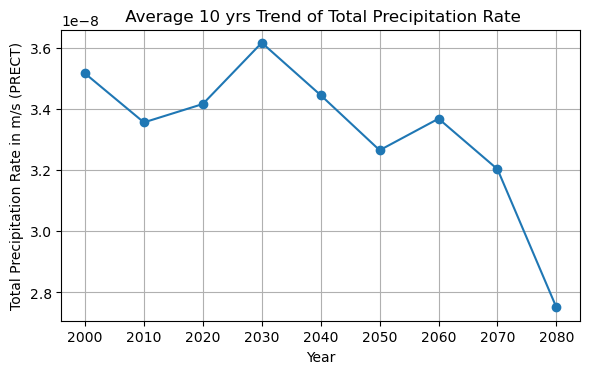

In [31]:
#visualizing the mean total prect rate trend in every 10 years time
#floor division of the year by 5 to get the quotient and then again multiplying by 5 to get the actual year
grouping_in_decade1 = df_1.groupby(df_1['year'] // 10 * 10)['PRECT'].mean()

# Plotting the change in total prect rate in every decade 
plt.figure(figsize=(6, 4))
plt.plot(grouping_in_decade1.index, grouping_in_decade1.values, marker='o', linestyle='-')
plt.title(' Average 10 yrs Trend of Total Precipitation Rate')
#year
plt.xlabel('Year')
#precipitation
plt.ylabel('Total Precipitation Rate in m/s (PRECT)')
plt.grid(True)
plt.xticks(grouping_in_decade1.index) 
plt.tight_layout()
plt.show()

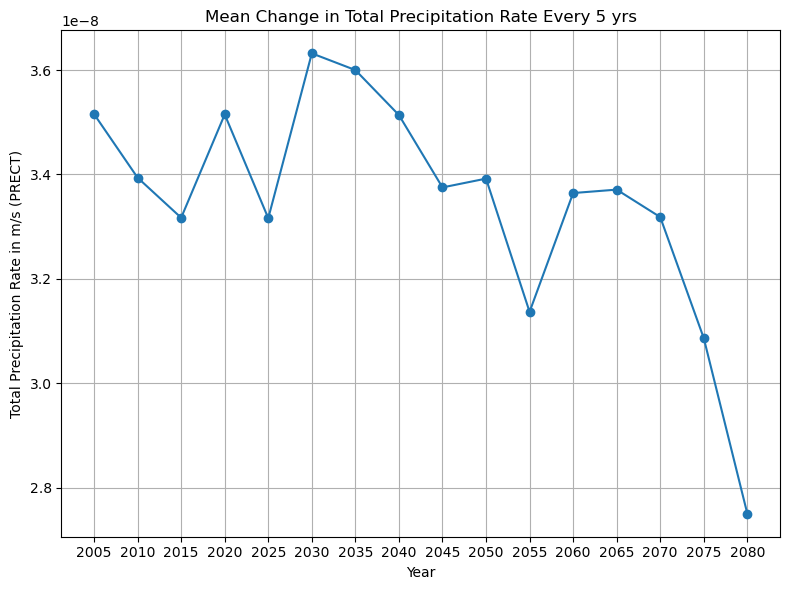

In [32]:
#visualizing the total prect rate trend in every 5 years time
#floor division of the year by 5 to get the quotient and then again multiplying by 5 to get the actual year
grouping_in_freq5 = df_1.groupby(df_1['year'] // 5 * 5)['PRECT'].mean()

# Plotting the change in temp in every decade 
plt.figure(figsize=(8, 6))
plt.plot(grouping_in_freq5.index, grouping_in_freq5.values, marker='o', linestyle='-')
plt.title('Mean Change in Total Precipitation Rate Every 5 yrs')
#year
plt.xlabel('Year')
#precipitation
plt.ylabel('Total Precipitation Rate in m/s (PRECT)')
plt.grid(True)
plt.xticks(grouping_in_freq5.index) 
plt.tight_layout()
plt.show()

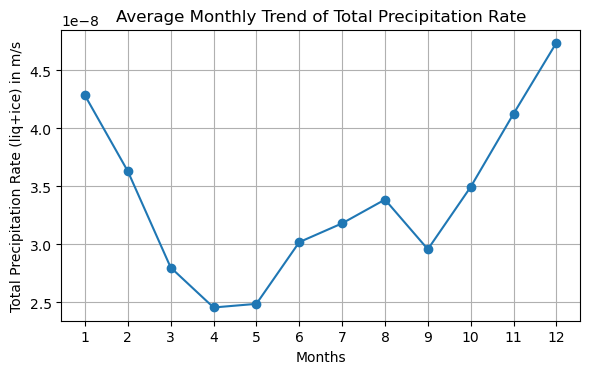

In [33]:
grouping_prect_months_mean = df_1.groupby(df_1['month'])['PRECT'].mean()


# Plotting the monthly prect trend
plt.figure(figsize=(6,4))
plt.plot(grouping_prect_months_mean.index, grouping_prect_months_mean.values, marker='o', linestyle='-')
plt.title('Average Monthly Trend of Total Precipitation Rate')
#months
plt.xlabel('Months')
#prect (liq+ice)
plt.ylabel('Total Precipitation Rate (liq+ice) in m/s')
plt.grid(True)
plt.xticks(grouping_prect_months_mean.index) 
plt.tight_layout()
plt.show()

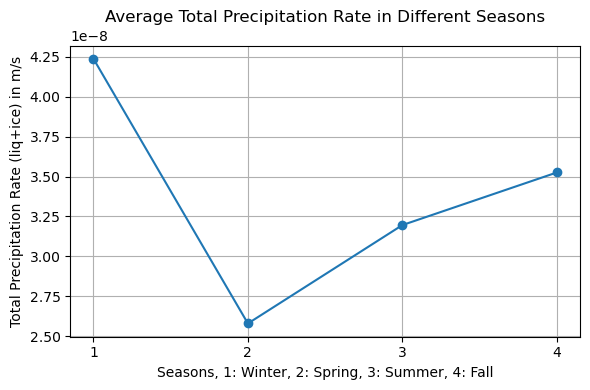

In [80]:
grouping_prect_szn_mean = df_1.groupby(df_1['season_enc'])['PRECT'].mean()


# Plotting seasonal trend of precipitation(liq+ice)
plt.figure(figsize=(6, 4))
plt.plot(grouping_prect_szn_mean.index, grouping_prect_szn_mean.values, marker='o', linestyle='-')
plt.title('Average Total Precipitation Rate in Different Seasons')
#season
plt.xlabel('Seasons, 1: Winter, 2: Spring, 3: Summer, 4: Fall')
#precipitation
plt.ylabel('Total Precipitation Rate (liq+ice) in m/s')
plt.grid(True)
plt.xticks(grouping_prect_szn_mean.index) 
plt.tight_layout()

FLNS (Net longwave flux at surface):

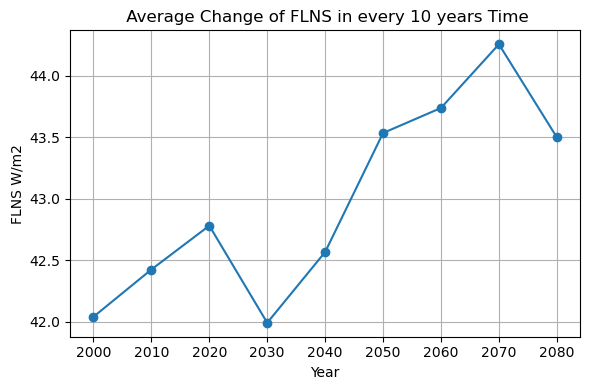

In [37]:
#visualizing the mean FLNS trend in every 10 years time
grouping_flns_decade = df_1.groupby(df_1['year'] // 10 * 10)['FLNS'].mean()
# Plotting the change in flns in every decade 
plt.figure(figsize=(6, 4))
plt.plot(grouping_flns_decade.index, grouping_flns_decade.values, marker='o', linestyle='-')
plt.title('Average Change of FLNS in every 10 years Time')
#year
plt.xlabel('Year')
#FLNS 
plt.ylabel('FLNS W/m2')
plt.grid(True)
plt.xticks(grouping_flns_decade.index) 
plt.tight_layout()
plt.show()

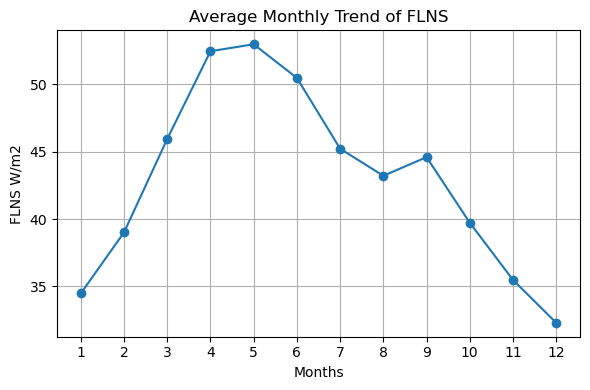

In [38]:
grouping_flns_months_mean = df_1.groupby(df_1['month'])['FLNS'].mean()


# Plotting the monthly flns trend
plt.figure(figsize=(6, 4))
plt.plot(grouping_flns_months_mean.index, grouping_flns_months_mean.values, marker='o', linestyle='-')
plt.title('Average Monthly Trend of FLNS')
#months
plt.xlabel('Months')
#flns
plt.ylabel('FLNS W/m2')
plt.grid(True)
plt.xticks(grouping_flns_months_mean.index) 
plt.tight_layout()
plt.show()

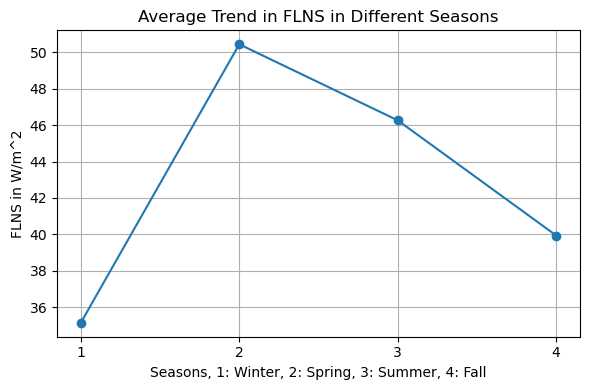

In [39]:
grouping_flns_szn_mean = df_1.groupby(df_1['season_enc'])['FLNS'].mean()


# Plotting seasonal trend of FLNS
plt.figure(figsize=(6, 4))
plt.plot(grouping_flns_szn_mean.index, grouping_flns_szn_mean.values, marker='o', linestyle='-')
plt.title('Average Trend in FLNS in Different Seasons')
#season
plt.xlabel('Seasons, 1: Winter, 2: Spring, 3: Summer, 4: Fall')
#fsns
plt.ylabel('FLNS in W/m^2')
plt.grid(True)
plt.xticks(grouping_flns_szn_mean.index) 
plt.tight_layout()
plt.show()

FSNS (Net solar flux at surface):

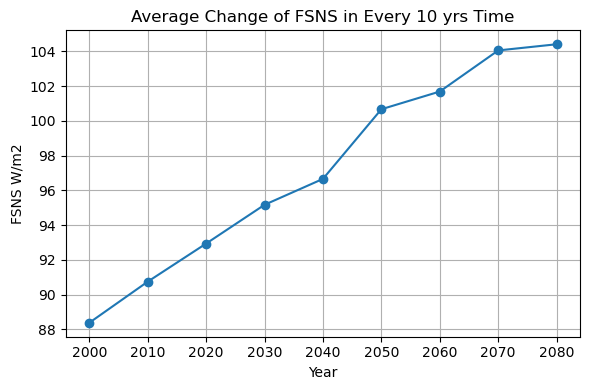

In [40]:
#visualizing the mean FSNS trend in every 10 years time

grouping_fsns_decade = df_1.groupby(df_1['year'] // 10 * 10)['FSNS'].mean()


# Plotting the change in fsns in every decade 
plt.figure(figsize=(6, 4))
plt.plot(grouping_fsns_decade.index, grouping_fsns_decade.values, marker='o', linestyle='-')
plt.title('Average Change of FSNS in Every 10 yrs Time')
#year
plt.xlabel('Year')
#FSNS 
plt.ylabel('FSNS W/m2')
plt.grid(True)
plt.xticks(grouping_fsns_decade.index) 
plt.tight_layout()
plt.show()

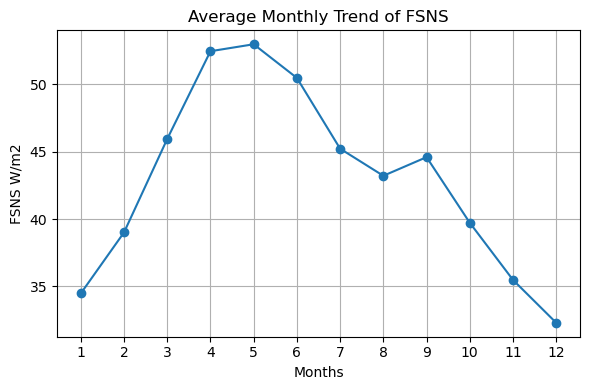

In [41]:
grouping_fsns_months_mean = df_1.groupby(df_1['month'])['FSNS'].mean()


# Plotting the monthly fsns trend
plt.figure(figsize=(6, 4))
plt.plot(grouping_fsns_months_mean.index, grouping_flns_months_mean.values, marker='o', linestyle='-')
plt.title('Average Monthly Trend of FSNS')
#months
plt.xlabel('Months')
#fsns
plt.ylabel('FSNS W/m2')
plt.grid(True)
plt.xticks(grouping_fsns_months_mean.index) 
plt.tight_layout()
plt.show()

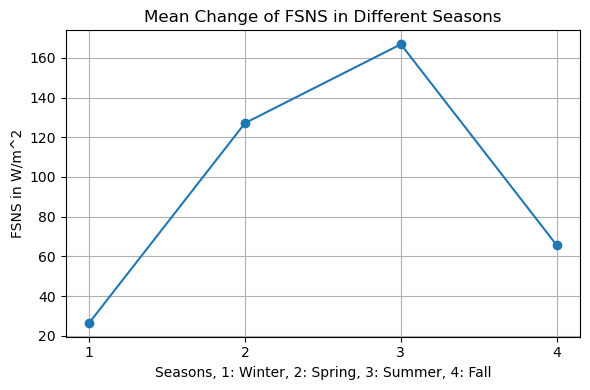

In [43]:
grouping_fsns_szn_mean = df_1.groupby(df_1['season_enc'])['FSNS'].mean()

# Plotting seasonal trend of FSNS
plt.figure(figsize=(6, 4))
plt.plot(grouping_fsns_szn_mean.index, grouping_fsns_szn_mean.values, marker='o', linestyle='-')
plt.title('Mean Change of FSNS in Different Seasons')
#season
plt.xlabel('Seasons, 1: Winter, 2: Spring, 3: Summer, 4: Fall')
#fsns
plt.ylabel('FSNS in W/m^2')
plt.grid(True)
plt.xticks(grouping_fsns_szn_mean.index) 
plt.tight_layout()
plt.show()

QBOT

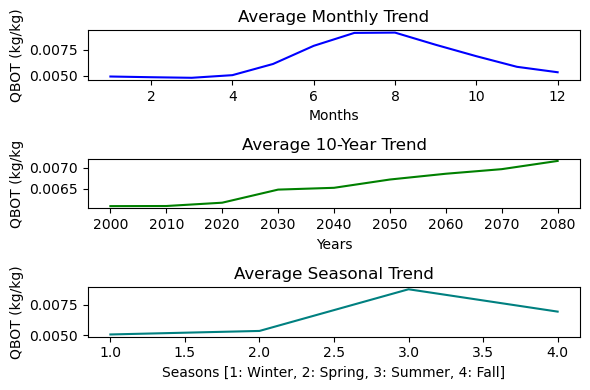

In [44]:
#grouping the data for trend analysis
grouping_qbot_decade = df_1.groupby(df_1['year'] // 10 * 10)['QBOT'].mean()
grouping_qbot_months_mean = df_1.groupby(df_1['month'])['QBOT'].mean()
grouping_qbot_szn_mean = df_1.groupby(df_1['season_enc'])['QBOT'].mean()

# figure and axis
fig, axs = plt.subplots(3, 1, figsize=(6,4))

# monthly trend
axs[0].plot(grouping_qbot_months_mean.index, grouping_qbot_months_mean.values, color='blue')
axs[0].set_title('Average Monthly Trend')
axs[0].set_ylabel('QBOT (kg/kg)')
axs[0].set_xlabel('Months')

# trend every 10 yrs
axs[1].plot(grouping_qbot_decade.index, grouping_qbot_decade.values, color='green')
axs[1].set_title('Average 10-Year Trend')
axs[1].set_ylabel('QBOT (kg/kg')
axs[1].set_xlabel('Years')

#Plotting seasonal trend of qbot
axs[2].plot(grouping_qbot_szn_mean.index, grouping_qbot_szn_mean.values, color='teal')
axs[2].set_title('Average Seasonal Trend')
axs[2].set_xlabel('Seasons [1: Winter, 2: Spring, 3: Summer, 4: Fall]')
axs[2].set_ylabel('QBOT (kg/kg)')


plt.tight_layout()


plt.show()

UBOT

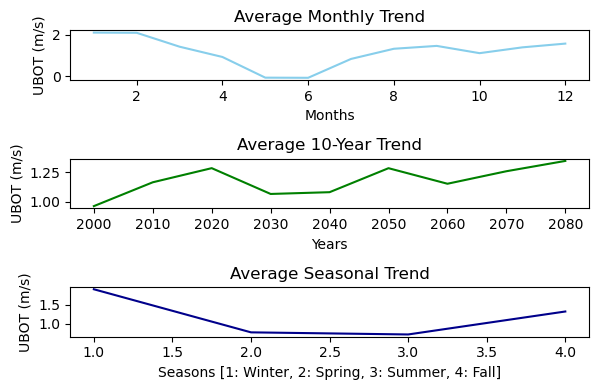

In [45]:
#grouping the data for trend analysis
grouping_ubot_decade = df_1.groupby(df_1['year'] // 10 * 10)['UBOT'].mean()
grouping_ubot_months_mean = df_1.groupby(df_1['month'])['UBOT'].mean()
grouping_ubot_szn_mean = df_1.groupby(df_1['season_enc'])['UBOT'].mean()

#3 rows and 1 plot in each row
fig, axs = plt.subplots(3, 1, figsize=(6, 4))

#monthly trend
axs[0].plot(grouping_ubot_months_mean.index, grouping_ubot_months_mean.values, color='skyblue')
axs[0].set_title('Average Monthly Trend')
axs[0].set_ylabel('UBOT (m/s)')
axs[0].set_xlabel('Months')

#trend analysis in every 10 yrs
axs[1].plot(grouping_ubot_decade.index, grouping_ubot_decade.values, color='green')
axs[1].set_title('Average 10-Year Trend')
axs[1].set_ylabel('UBOT (m/s)')
axs[1].set_xlabel('Years')

#seasonal trend analysis
axs[2].plot(grouping_ubot_szn_mean.index, grouping_ubot_szn_mean.values, color='darkblue')
axs[2].set_title('Average Seasonal Trend')
axs[2].set_xlabel('Seasons [1: Winter, 2: Spring, 3: Summer, 4: Fall]')
axs[2].set_ylabel('UBOT (m/s)')


plt.tight_layout()

plt.show()

VBOT

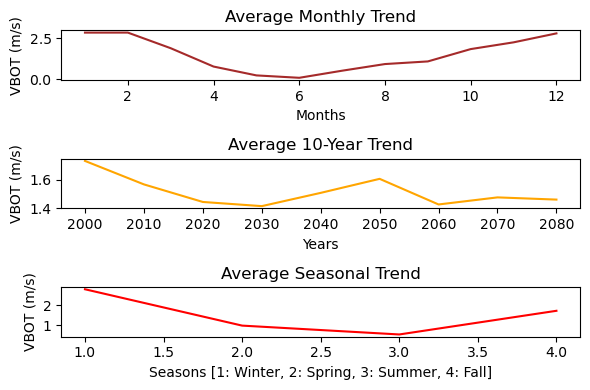

In [46]:
#3 groups of data for monthly, 10-year trend and seasonal trend analysis
grouping_vbot_decade = df_1.groupby(df_1['year'] // 10 * 10)['VBOT'].mean()
grouping_vbot_months_mean = df_1.groupby(df_1['month'])['VBOT'].mean()
grouping_vbot_szn_mean = df_1.groupby(df_1['season_enc'])['VBOT'].mean()

#3 subplots 
fig, axs = plt.subplots(3, 1, figsize=(6, 4))

# Visualising Monthly trend analysis
axs[0].plot(grouping_vbot_months_mean.index, grouping_vbot_months_mean.values, color='brown')
axs[0].set_title('Average Monthly Trend')
axs[0].set_ylabel('VBOT (m/s)')
axs[0].set_xlabel('Months')


# Visualising the 10 year trend
axs[1].plot(grouping_vbot_decade.index, grouping_vbot_decade.values, color='orange')
axs[1].set_title('Average 10-Year Trend')
axs[1].set_ylabel('VBOT (m/s)')
axs[1].set_xlabel('Years')

# Visualising the seasonal trend analysis
axs[2].plot(grouping_vbot_szn_mean.index, grouping_vbot_szn_mean.values, color='red')
axs[2].set_title('Average Seasonal Trend')
axs[2].set_xlabel('Seasons [1: Winter, 2: Spring, 3: Summer, 4: Fall]')
axs[2].set_ylabel('VBOT (m/s)')


plt.tight_layout()
plt.show()

PRSN

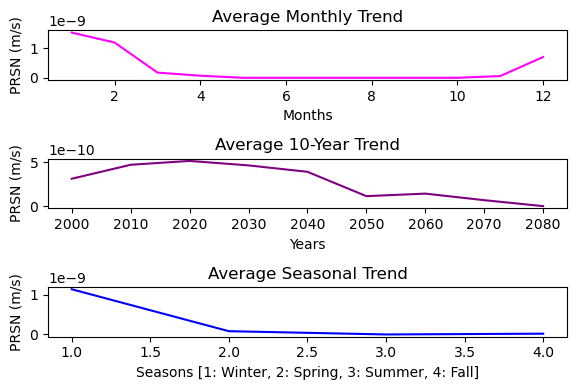

In [47]:
#grouping the data for specific trend analysis in every 10 yrs, monthly and seasonal
grouping_prsn_decade = df_1.groupby(df_1['year'] // 10 * 10)['PRSN'].mean()
grouping_prsn_months_mean = df_1.groupby(df_1['month'])['PRSN'].mean()
grouping_prsn_szn_mean = df_1.groupby(df_1['season_enc'])['PRSN'].mean()

#3 subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 4))

#plotting the monthly trend with title and labels for both axes
axs[0].plot(grouping_prsn_months_mean.index, grouping_prsn_months_mean.values, color='magenta')
axs[0].set_title('Average Monthly Trend')
axs[0].set_ylabel('PRSN (m/s)')
axs[0].set_xlabel('Months')

#10-year trend with title and labels for both axes
axs[1].plot(grouping_prsn_decade.index, grouping_prsn_decade.values, color='purple')
axs[1].set_title('Average 10-Year Trend')
axs[1].set_ylabel('PRSN (m/s)')
axs[1].set_xlabel('Years')


#Seasonal trend with title and labels for both axes
axs[2].plot(grouping_prsn_szn_mean.index, grouping_prsn_szn_mean.values, color='blue')
axs[2].set_title('Average Seasonal Trend')
axs[2].set_xlabel('Seasons [1: Winter, 2: Spring, 3: Summer, 4: Fall]')
axs[2].set_ylabel('PRSN (m/s)')


plt.tight_layout()


plt.show()

# Analysing the difference between the two temp features

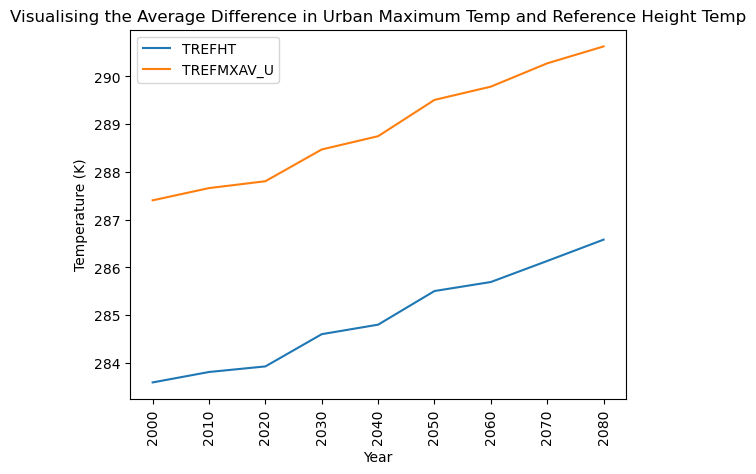

In [48]:
#visualing the avg difference in Urban Maximum Temp and Reference Height Temp
fig, ax = plt.subplots()
#first grouping the data by year and temp and averaging them
grouping_trefht_decade = df_1.groupby(df_1['year'] // 10 * 10)['TREFHT'].mean()
grouping_in_decade = df_1.groupby(df_1['year'] // 10 * 10)['TREFMXAV_U'].mean()

#plotting the grouped data on the same plot
ax.plot(grouping_trefht_decade.index, grouping_trefht_decade.values, label='TREFHT')
ax.plot(grouping_in_decade.index, grouping_in_decade.values, label='TREFMXAV_U')
#title, labels
plt.title('Visualising the Average Difference in Urban Maximum Temp and Reference Height Temp')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.xticks(rotation=90)
ax.legend()


On average, there is a temp difference of almost 3 Kelvin

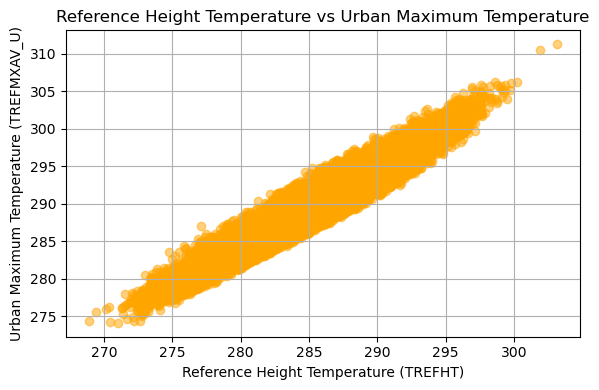

In [49]:
# Plotting TREFHT vs TREFMXAV_U
plt.figure(figsize=(6, 4))
plt.scatter(df_1['TREFHT'], df_1['TREFMXAV_U'], alpha=0.5, color = 'orange')
plt.title('Reference Height Temperature vs Urban Maximum Temperature')
plt.xlabel('Reference Height Temperature (TREFHT)')
plt.ylabel('Urban Maximum Temperature (TREFMXAV_U)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
corr_refheight_urbantemp = pearsonr(df_1["TREFHT"],df_1["TREFMXAV_U"])
print(corr_refheight_urbantemp)

PearsonRResult(statistic=0.9676202374231692, pvalue=0.0)


The TREFHT and TREFMXAV_U shows a linear relationship. The correlation is 0.96, which suggests strong positive correlation. This should be the case as both of the variables measure temperature and the only difference is TREFHT is used for general cases and the other variable is used in urban areas, to catch the temperature caused by human activities. 

# How temp affects the variables?

PRECT

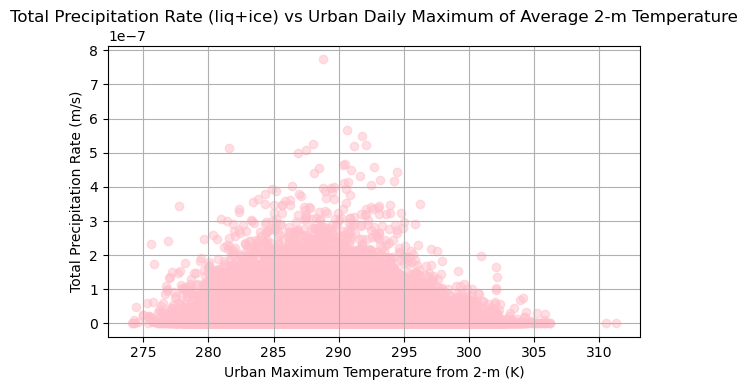

In [51]:
# Plotting PRECT vs TREFMXAV_U
plt.figure(figsize=(6, 4))
plt.scatter(df_1['TREFMXAV_U'], df_1['PRECT'], alpha=0.5, color = 'pink')
plt.title('Total Precipitation Rate (liq+ice) vs Urban Daily Maximum of Average 2-m Temperature')
plt.xlabel('Urban Maximum Temperature from 2-m (K)')
plt.ylabel('Total Precipitation Rate (m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

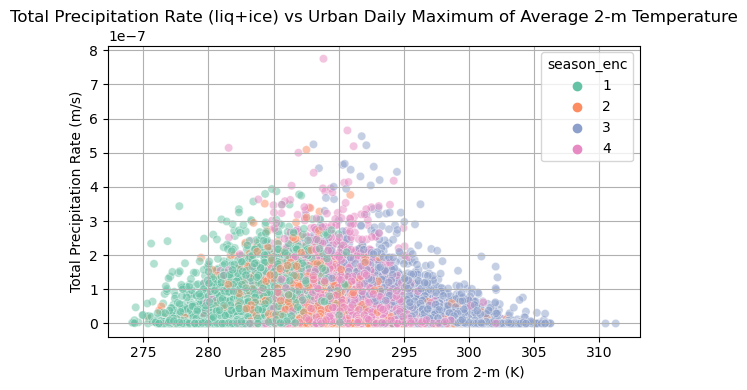

In [52]:
#plotting the scatter plot with hue to see how it varies in different seasons
plt.figure(figsize=(6, 4))
#using seaborn to use the hue feature
sns.scatterplot(data=df_1, x='TREFMXAV_U', y='PRECT', hue='season_enc', palette='Set2', alpha=0.5)
plt.title('Total Precipitation Rate (liq+ice) vs Urban Daily Maximum of Average 2-m Temperature')
plt.xlabel('Urban Maximum Temperature from 2-m (K)')
plt.ylabel('Total Precipitation Rate (m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

From the above graph it can be observed that as temperature increases, total precipitation rate also increases until 290 Kelvin and then gradually the total precipitation rate tends to decrease as temperature continues to increase. The precipitation rate is highest around summer and fall seasons.

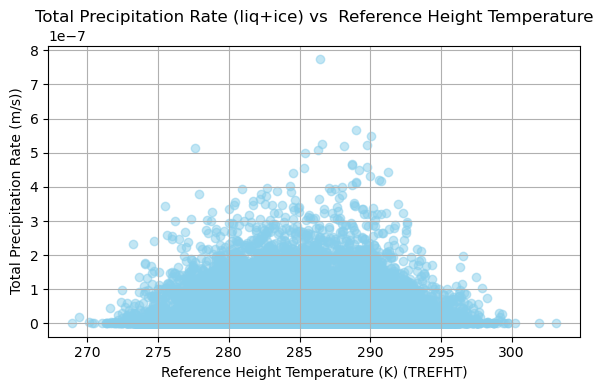

In [53]:
# Plotting PRECT vs TREFHT
plt.figure(figsize=(6, 4))
plt.scatter(df_1['TREFHT'], df_1['PRECT'], alpha=0.5, color = 'skyblue')
plt.title('Total Precipitation Rate (liq+ice) vs  Reference Height Temperature')
plt.xlabel('Reference Height Temperature (K) (TREFHT)')
plt.ylabel('Total Precipitation Rate (m/s))')
plt.grid(True)
plt.tight_layout()
plt.show()

QBOT

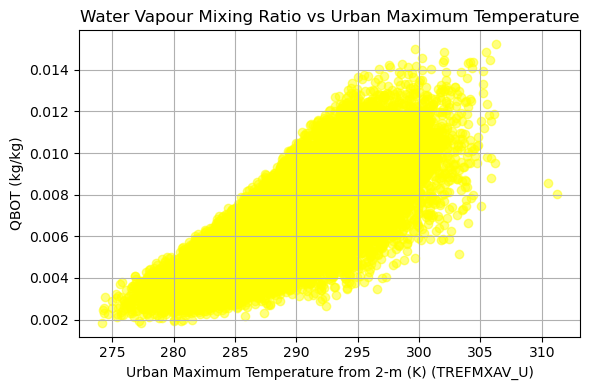

In [54]:
# Plotting QBOT vs TREFMXAV_U
plt.figure(figsize=(6, 4))
plt.scatter(df_1['TREFMXAV_U'], df_1['QBOT'], alpha=0.5, color = 'yellow')
plt.title('Water Vapour Mixing Ratio vs Urban Maximum Temperature')
plt.xlabel('Urban Maximum Temperature from 2-m (K) (TREFMXAV_U)')
plt.ylabel('QBOT (kg/kg)')
plt.grid(True)
plt.tight_layout()
plt.show()

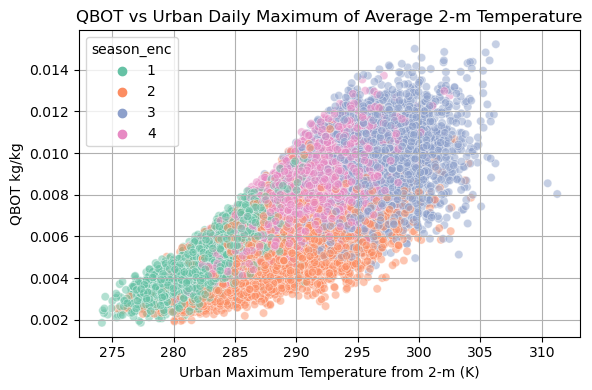

In [55]:
#plotting the scatter plot with hue to see how it varies in different seasons
plt.figure(figsize=(6, 4))
#using seaborn to use the hue feature
sns.scatterplot(data=df_1, x='TREFMXAV_U', y='QBOT', hue='season_enc', palette='Set2', alpha=0.5)
plt.title('QBOT vs Urban Daily Maximum of Average 2-m Temperature')
plt.xlabel('Urban Maximum Temperature from 2-m (K)')
plt.ylabel('QBOT kg/kg')
plt.grid(True)
plt.tight_layout()
plt.show()

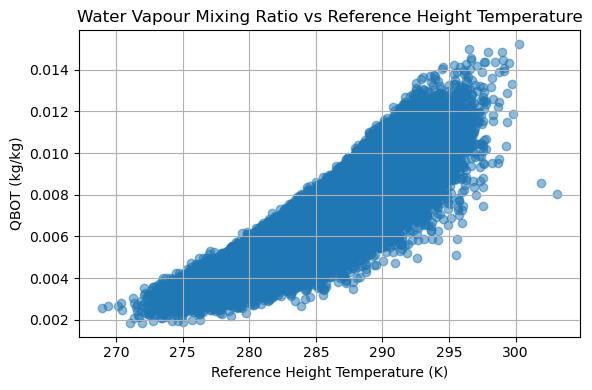

In [56]:
# Plotting QBOT vs TREFHT
plt.figure(figsize=(6, 4))
plt.scatter(df_1['TREFHT'], df_1['QBOT'], alpha=0.5)
plt.title('Water Vapour Mixing Ratio vs Reference Height Temperature')
plt.xlabel('Reference Height Temperature (K)')
plt.ylabel('QBOT (kg/kg)')
plt.grid(True)
plt.tight_layout()
plt.show()

PRSN

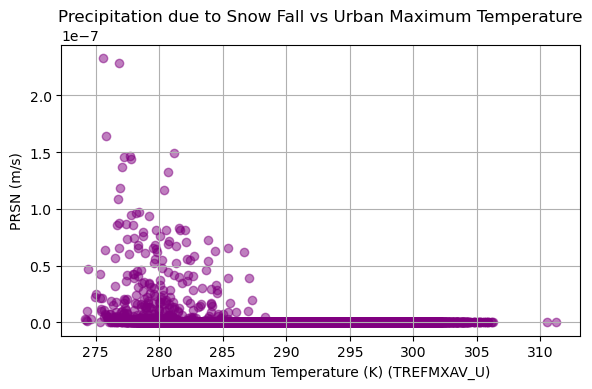

In [57]:
# Plotting PRSN vs TREFMXAV_U
plt.figure(figsize=(6, 4))
plt.scatter(df_1['TREFMXAV_U'], df_1['PRSN'], alpha=0.5, color = 'purple')
plt.title('Precipitation due to Snow Fall vs Urban Maximum Temperature')
plt.xlabel('Urban Maximum Temperature (K) (TREFMXAV_U)')
plt.ylabel('PRSN (m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

The precipitation rate due to snow fall is associated only with lower temperatures. However, as seen from the above discussion, the precipitation rates are not associated with temperatures below or equal to the freezing point of water. Hence, might be the case of a potential source of errors.

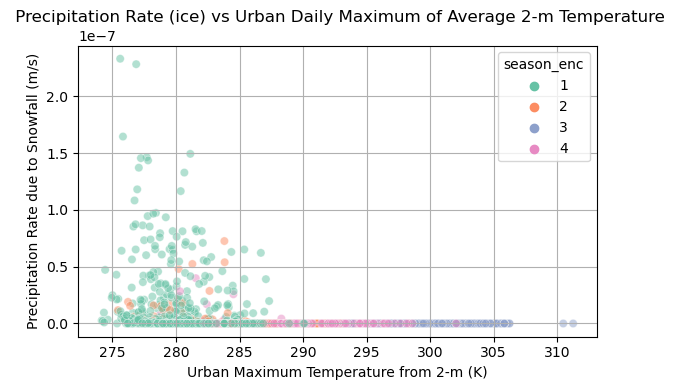

In [58]:
#plotting the scatter plot with hue to see how it varies in different seasons
plt.figure(figsize=(6, 4))
#using seaborn to use the hue feature
sns.scatterplot(data=df_1, x='TREFMXAV_U', y='PRSN', hue='season_enc', palette='Set2', alpha=0.5)
plt.title(' Precipitation Rate (ice) vs Urban Daily Maximum of Average 2-m Temperature')
plt.xlabel('Urban Maximum Temperature from 2-m (K)')
plt.ylabel('Precipitation Rate due to Snowfall (m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

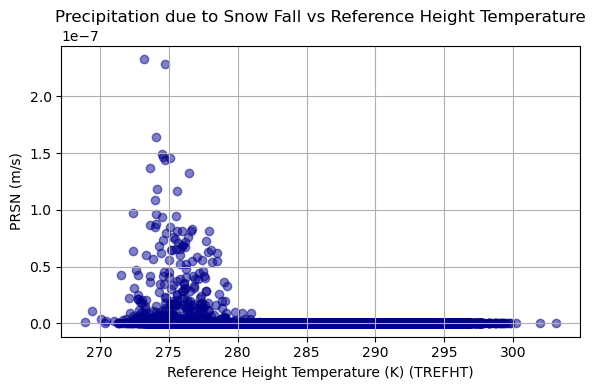

In [59]:
# Plotting PRSN vs TREFHT
plt.figure(figsize=(6, 4))
plt.scatter(df_1['TREFHT'], df_1['PRSN'], alpha=0.5, color = 'darkblue')
plt.title('Precipitation due to Snow Fall vs Reference Height Temperature')
plt.xlabel('Reference Height Temperature (K) (TREFHT)')
plt.ylabel('PRSN (m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

FSNS

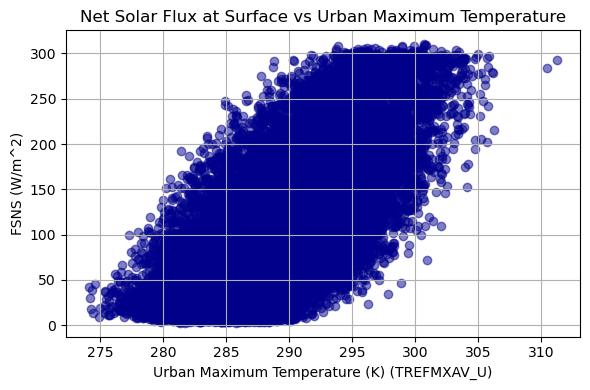

In [60]:
# Plotting FSNS vs TREFMXAV_U
plt.figure(figsize=(6, 4))
plt.scatter(df_1['TREFMXAV_U'], df_1['FSNS'], alpha=0.5, color='darkblue')
plt.title('Net Solar Flux at Surface vs Urban Maximum Temperature')
plt.xlabel('Urban Maximum Temperature (K) (TREFMXAV_U)')
plt.ylabel('FSNS (W/m^2)')
plt.grid(True)
plt.tight_layout()
plt.show()

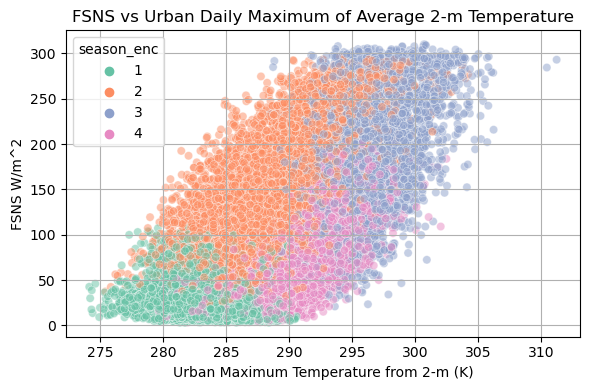

In [61]:
#plotting the scatter plot with hue to see how it varies in different seasons
plt.figure(figsize=(6, 4))
#using seaborn to use the hue feature
sns.scatterplot(data=df_1, x='TREFMXAV_U', y='FSNS', hue='season_enc', palette='Set2', alpha=0.5)
plt.title('FSNS vs Urban Daily Maximum of Average 2-m Temperature')
plt.xlabel('Urban Maximum Temperature from 2-m (K)')
plt.ylabel('FSNS W/m^2')
plt.grid(True)
plt.tight_layout()
plt.show()

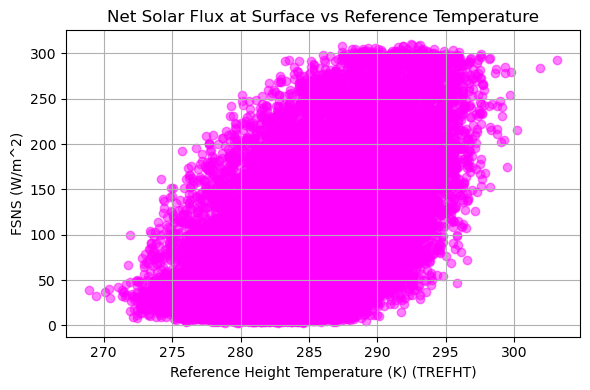

In [67]:
# Plotting FSNS vs TREFHT
plt.figure(figsize=(6, 4))
plt.scatter(df_1['TREFHT'], df_1['FSNS'], alpha=0.5, color='magenta')
plt.title('Net Solar Flux at Surface vs Reference Temperature')
plt.xlabel('Reference Height Temperature (K) (TREFHT)')
plt.ylabel('FSNS (W/m^2)')
plt.grid(True)
plt.tight_layout()
plt.show()

FLNS

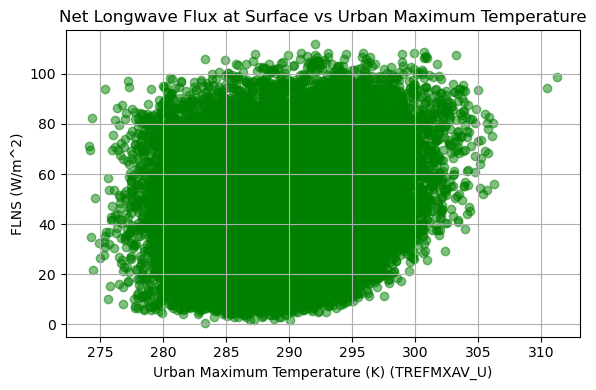

In [65]:
# Plotting FLNS vs TREFMXAV_U
plt.figure(figsize=(6, 4))
plt.scatter(df_1['TREFMXAV_U'], df_1['FLNS'], alpha=0.5, color = 'green')
plt.title('Net Longwave Flux at Surface vs Urban Maximum Temperature')
plt.xlabel('Urban Maximum Temperature (K) (TREFMXAV_U)')
plt.ylabel('FLNS (W/m^2)')
plt.grid(True)
plt.tight_layout()
plt.show()

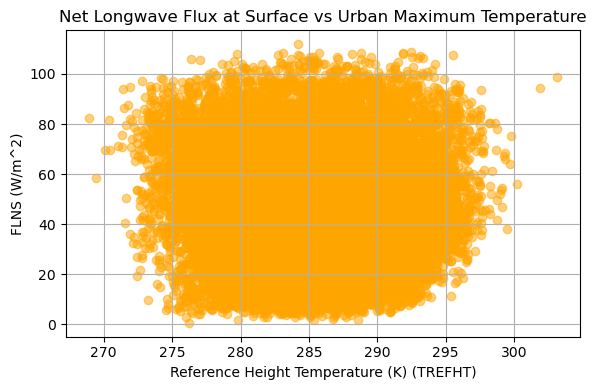

In [68]:
# Plotting FLNS vs TREFHT
plt.figure(figsize=(6, 4))
plt.scatter(df_1['TREFHT'], df_1['FLNS'], alpha=0.5, color = 'orange')
plt.title('Net Longwave Flux at Surface vs Urban Maximum Temperature')
plt.xlabel('Reference Height Temperature (K) (TREFHT)')
plt.ylabel('FLNS (W/m^2)')
plt.grid(True)
plt.tight_layout()
plt.show()

UBOT

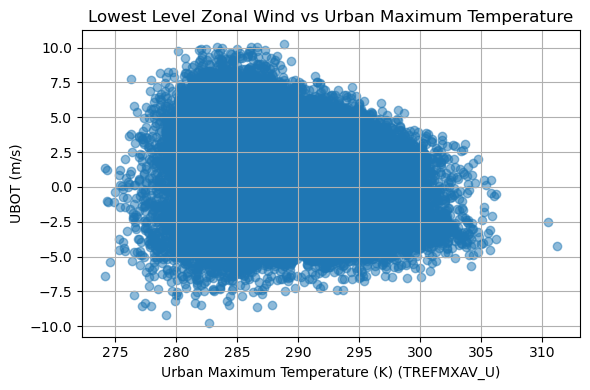

In [69]:
# Plotting UBOT vs TREFMXAV_U
plt.figure(figsize=(6, 4))
plt.scatter(df_1['TREFMXAV_U'], df_1['UBOT'], alpha=0.5)
plt.title('Lowest Level Zonal Wind vs Urban Maximum Temperature')
plt.xlabel('Urban Maximum Temperature (K) (TREFMXAV_U)')
plt.ylabel('UBOT (m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

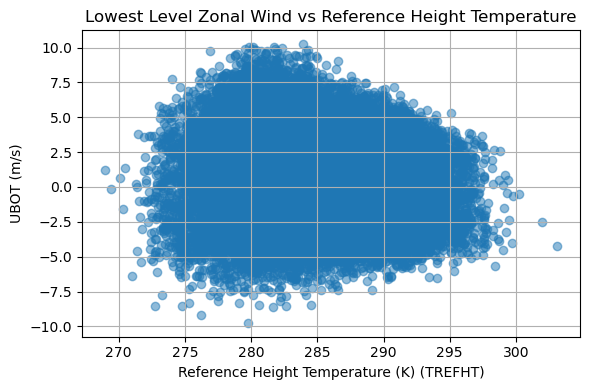

In [70]:
# Plotting UBOT vs TREFHT
plt.figure(figsize=(6, 4))
plt.scatter(df_1['TREFHT'], df_1['UBOT'], alpha=0.5)
plt.title('Lowest Level Zonal Wind vs Reference Height Temperature')
plt.xlabel('Reference Height Temperature (K) (TREFHT)')
plt.ylabel('UBOT (m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

VBOT

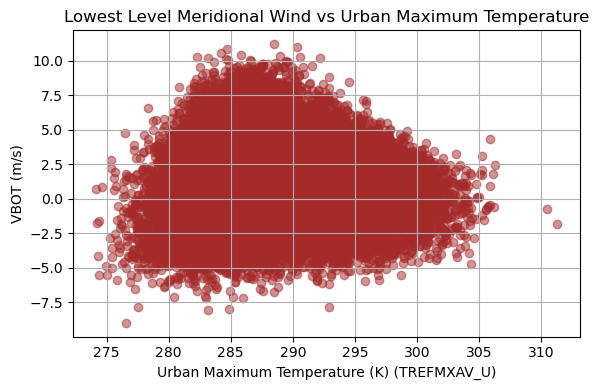

In [71]:
# Plotting VBOT vs TREFMXAV_U
plt.figure(figsize=(6, 4))
plt.scatter(df_1['TREFMXAV_U'], df_1['VBOT'], alpha=0.5, color = 'brown')
plt.title('Lowest Level Meridional Wind vs Urban Maximum Temperature')
plt.xlabel('Urban Maximum Temperature (K) (TREFMXAV_U)')
plt.ylabel('VBOT (m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

There is no apparent relationship between Temperature and meridional wind as suggested by the figure.But wind speed from the south is higher than the wind speed of the north as shown in the diagram.

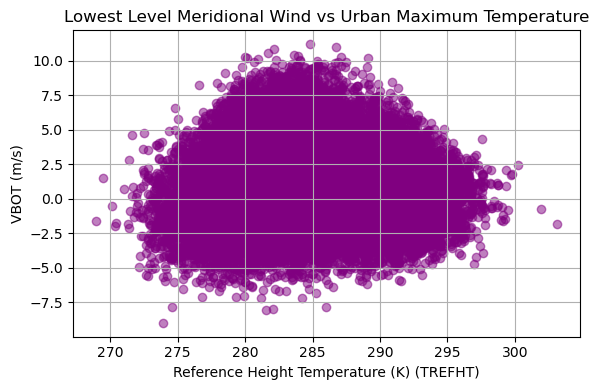

In [72]:
# Plotting VBOT vs TREFHT
plt.figure(figsize=(6, 4))
plt.scatter(df_1['TREFHT'], df_1['VBOT'], alpha=0.5, color = 'purple')
plt.title('Lowest Level Meridional Wind vs Urban Maximum Temperature')
plt.xlabel('Reference Height Temperature (K) (TREFHT)')
plt.ylabel('VBOT (m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Distributions

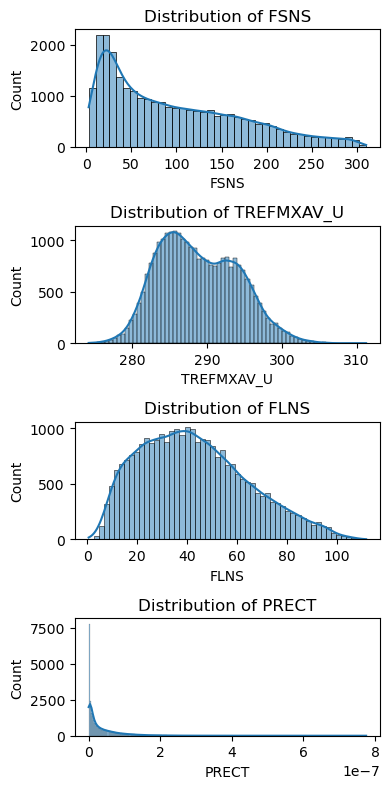

In [73]:
column_name1 = {'TREFMXAV_U','FSNS', 'FLNS', 'PRECT'}
#nrows = 4, the figsize is multiplied by 4 to make enough space for 4 plots
fig, axes = plt.subplots(4, figsize=(4, 2 * 4))

# Plotting the first 4 columns due to MemoryError
# with kde its easier to visualise the shape
for i, column in enumerate(column_name1):
    sns.histplot(df_1[column], ax=axes[i], kde=True)  
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


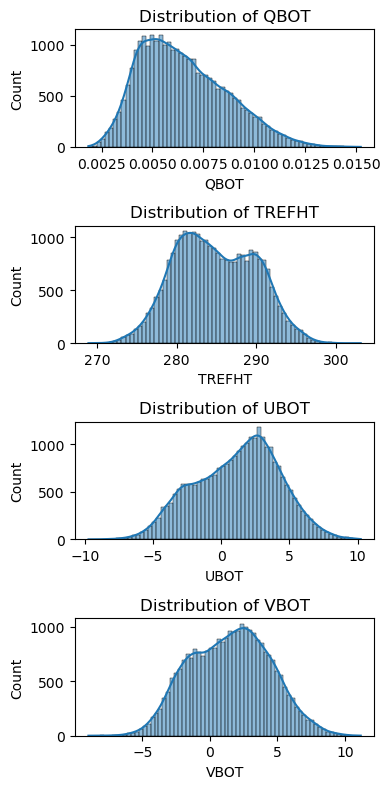

In [74]:
#Other 4 columns
column_name2 = {'TREFHT','VBOT', 'UBOT', 'QBOT'}
fig, axes = plt.subplots(4, figsize=(4, 2 * 4))

# Plot each column's distribution
for i, column in enumerate(column_name2):
    sns.histplot(df_1[column], ax=axes[i], kde=True)  # Plot a histogram with kernel density estimation
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Spearman Correlation Matrix

C:\Users\Raisina Chowdhury\AppData\Local\Temp\ipykernel_4312\232313039.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_1.corr(method='spearman')


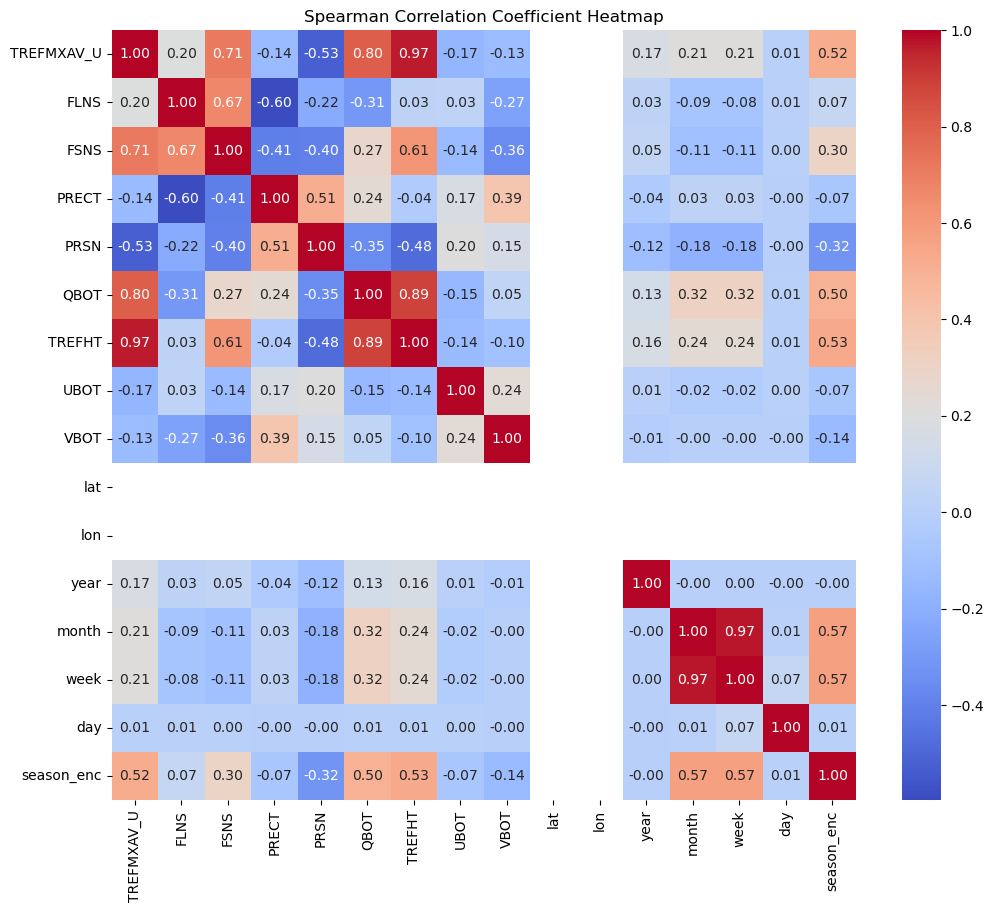

In [75]:
correlation_matrix = df_1.corr(method='spearman')

#Visualising the matrix as a heatmap. 
#Warm tones indicate positive relationship while cooler tones indicate negative correlation
plt.figure(figsize=(12, 10))
#using seaborn to plot the heatmap
#coefficients are displayed in 2 significant figures
#annot = True shows the coefficients on the map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Coefficient Heatmap')
plt.show()

Spearman Correlation Matrix as most of the scatter plots are showing non-linear relationships, spearman correlation matrix is better suited to understand the strength of the relationships.

# Exploring Other Relationships

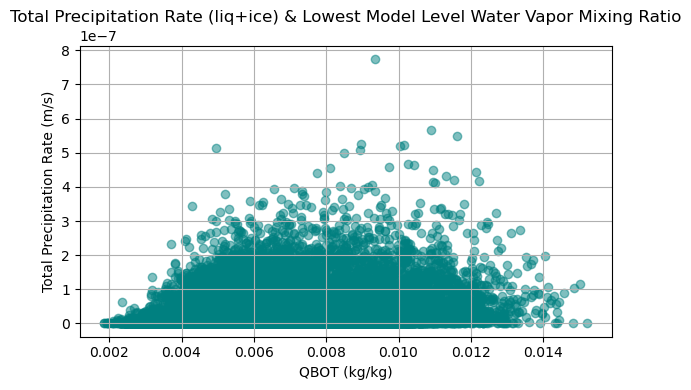

In [76]:
# Plotting PRECT vs QBOT
plt.figure(figsize=(6, 4))
plt.scatter(df_1['QBOT'], df_1['PRECT'], alpha=0.5, color = 'teal')
plt.title('Total Precipitation Rate (liq+ice) & Lowest Model Level Water Vapor Mixing Ratio')
plt.xlabel('QBOT (kg/kg)')
plt.ylabel('Total Precipitation Rate (m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

As humidity increases, total precipitation rate tends to increase until certain point and then it decreases even when the temperature increases.

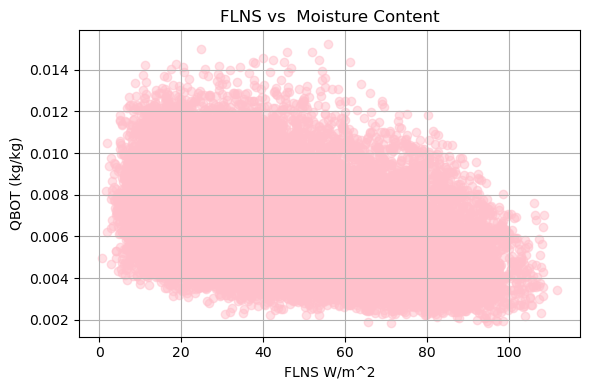

In [78]:
# Plotting FLNS vs QBOT
plt.figure(figsize=(6, 4))
plt.scatter(df_1['FLNS'], df_1['QBOT'], alpha=0.5, color = 'pink')
plt.title('FLNS vs  Moisture Content')
plt.xlabel('FLNS W/m^2')
plt.ylabel('QBOT (kg/kg)')
plt.grid(True)
plt.tight_layout()
plt.show()

Negative and weak relationship
Spearman Correlation Coeff = -0.31 
An increase in FLNS is associated with a decrease in QBOT.

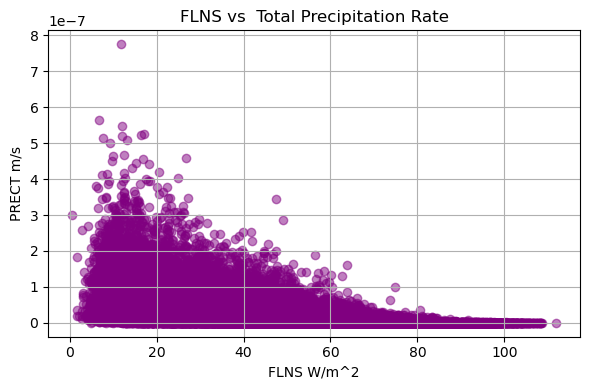

In [77]:
# Plotting FLNS vs PRECT
plt.figure(figsize=(6, 4))
plt.scatter(df_1['FLNS'], df_1['PRECT'], alpha=0.5, color = 'purple')
plt.title('FLNS vs  Total Precipitation Rate')
plt.xlabel('FLNS W/m^2')
plt.ylabel('PRECT m/s')
plt.grid(True)
plt.tight_layout()
plt.show()

Negative and moderate relationship
Spearman Correlation Coeff = -0.60
As FLNS increases, PRECT increases to some extent and then decreases
It could be that as the moisture content decreases, precipitation rate decreases too


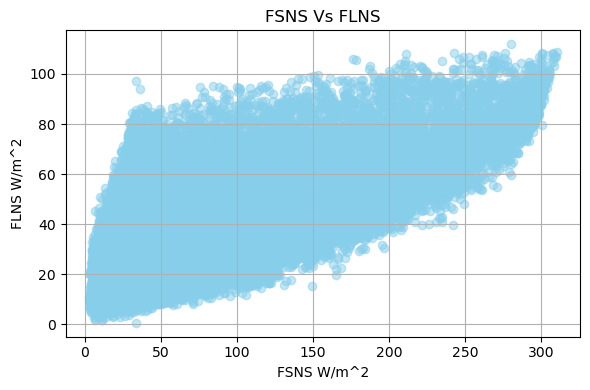

In [79]:
# Plotting FSNS vs FLNS
plt.figure(figsize=(6, 4))
plt.scatter(df_1['FSNS'], df_1['FLNS'], alpha=0.5, color = 'skyblue')
plt.title('FSNS Vs FLNS')
plt.xlabel('FSNS W/m^2')
plt.ylabel('FLNS W/m^2')
plt.grid(True)
plt.tight_layout()
plt.show()

Trapezium shape. Shows positive relationship, however, there is an underlying relationship which can be better explained with other factors

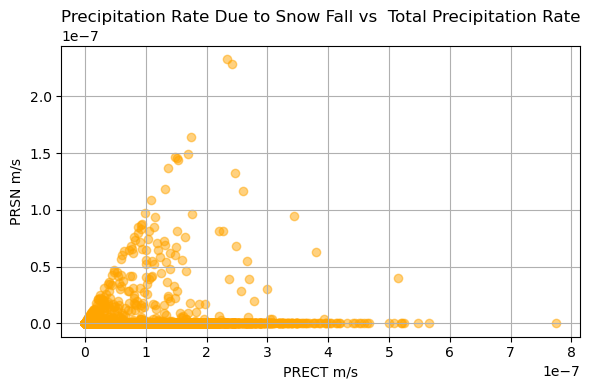

In [81]:
# Plotting PRSN vs PRECT
plt.figure(figsize=(6, 4))
plt.scatter(df_1['PRECT'], df_1['PRSN'], alpha=0.5, color = 'orange')
plt.title('Precipitation Rate Due to Snow Fall vs  Total Precipitation Rate')
plt.xlabel('PRECT m/s')
plt.ylabel('PRSN m/s')
plt.grid(True)
plt.tight_layout()
plt.show()

In [103]:
#collecting all the data of 2006
yr_2006 = df_1[df_1['year'] == 2006]

#using numpy to calculate the mean of all the variables in 2006
yr_mean_2006 = np.mean(yr_2006)

print(yr_mean_2006)

TREFMXAV_U             2.872274e+02
FLNS                   4.193189e+01
FSNS                   8.733228e+01
PRECT                  3.349077e-08
PRSN                   3.183109e-10
QBOT                   6.036924e-03
TREFHT                 2.833520e+02
UBOT                   8.887526e-01
VBOT                   1.547858e+00
lat                    5.324608e+01
lon                    3.575000e+02
year                   2.006000e+03
month                  6.556474e+00
week                   2.657025e+01
day                    1.579890e+01
season_enc             2.512397e+00
FSNS_percent_change    3.475173e+01
dtype: float64


C:\Users\Raisina Chowdhury\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Raisina Chowdhury\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [126]:
Utemp_mean = df_1.groupby('year')['TREFMXAV_U'].mean()
print(Utemp_mean)

year
2006    287.227400
2007    287.660296
2008    287.674791
2009    287.066897
2010    287.782010
           ...    
2076    289.547425
2077    290.837578
2078    290.797692
2079    290.958279
2080    290.626594
Name: TREFMXAV_U, Length: 75, dtype: float64


In [117]:
#grouping urban temp by year and then finding out mean
Utemp_mean = df_1.groupby('year')['TREFMXAV_U'].mean()

#since year is the index we can easily locate the value for 2006 and 2080
Utemp_2006 = Utemp_mean.loc[2006]
Utemp_2080 =Utemp_mean.loc[2080]

#percentage change formula
Utemp_percentage_chng = ((Utemp_2080 - Utemp_2006) / Utemp_2006) * 100

print(Utemp_percentage_chng)

1.183450253508031


In [119]:
#grouping reference heigh temp by year and then finding out mean
Rtemp_mean = df_1.groupby('year')['TREFHT'].mean()
#since year is the index we can easily locate the value for 2006 and 2080
Rtemp_2006 = Rtemp_mean.loc[2006]
Rtemp_2080 = Rtemp_mean.loc[2080]
#percentage change formula
Rtemp_percentage_chng = ((Rtemp_2080 - Rtemp_2006)/Rtemp_2006)*100
print(Rtemp_percentage_chng)

1.1397502754602802


In [120]:
#grouping prect by year and then finding out mean
prect_mean = df_1.groupby('year')['PRECT'].mean()
#since year is the index we can easily locate the value for 2006 and 2080
prect_2006 = prect_mean.loc[2006]
prect_2080 = prect_mean.loc[2080]
prect_percentage_chng = ((prect_2080 - prect_2006)/prect_2006)*100
print(prect_percentage_chng)

-17.875603480137254


In [121]:
#grouping prsn by year and then finding out mean
prsn_mean = df_1.groupby('year')['PRSN'].mean()
#since year is the index we can easily locate the value for 2006 and 2080
prsn_2006 = prsn_mean.loc[2006]
prsn_2080 = prsn_mean.loc[2080]
prsn_percentage_chng = ((prsn_2080 - prsn_2006)/prsn_2006)*100
print(prsn_percentage_chng)

-99.99157115825427


In [122]:
#grouping qbot by year and finding out mean
qbot_mean = df_1.groupby('year')['QBOT'].mean()
#since year is the index we can easily locate the value for 2006 and 2080
qbot_2006 = qbot_mean.loc[2006]
qbot_2080 = qbot_mean.loc[2080]
qbot_percentage_chng = ((qbot_2080 - qbot_2006)/qbot_2006)*100
print(qbot_percentage_chng)

18.77823312131197


In [123]:
#grouping ubot by year and finding out mean
ubot_mean = df_1.groupby('year')['UBOT'].mean()
#since year is the index we can easily locate the value for 2006 and 2080
ubot_2006 = ubot_mean.loc[2006]
ubot_2080 = ubot_mean.loc[2080]
ubot_percentage_chng = ((ubot_2080 - ubot_2006)/ubot_2006)*100
print(ubot_percentage_chng)

51.5306480441281


In [124]:
#grouping vbot by year and finding out mean
vbot_mean = df_1.groupby('year')['VBOT'].mean()
#since year is the index we can easily locate the value for 2006 and 2080
vbot_2006 = vbot_mean.loc[2006]
vbot_2080 = vbot_mean.loc[2080]
vbot_percentage_chng = ((vbot_2080 - vbot_2006)/vbot_2006)*100
print(vbot_percentage_chng)

-5.713559137916993


# Project Reflection

The dataset that was given comprised information on meteorological measures for Manchester. All the features in the dataset were continuous variables, except for ‘time’. The ‘time’ variable had to be converted to the date-time format using pandas. Subsequently, it was decomposed into years, months, weeks, days, hours, minutes, and seconds for further analysis. However, there were no entries for hours, minutes and seconds. The data ranged from 2006 to 2080, which means that the data was simulated. 

Further, there were anomalies present in the data that included negative values for total precipitation rates (PRECT) and precipitation rates due to snowfall (PRSN). This could be attributed to the computational error, and could be replaced by 0. Further, there were PRSN values higher than 0 for temperatures higher than the freezing temperature, which is usually 0-2 degrees Celsius. 

Moving to the analysis, I conducted a temporal analysis first on all the variables. This is because it was a futuristic dataset, and it was important to understand the trend with time. I mainly looked at the monthly, seasonal, and every 10-year trends. To conduct the seasonal trend analysis, I added a seasonality component to the dataset. The key findings from the analysis are:
1.	The mean urban temp is anticipated to reach 17.5 degrees Celsius in 2080 from 14.2 degrees Celsius in 2006. The highest temperature in 2080 could be 30.85 degrees for urban areas and 24.49 degrees for general cases.
2.	The mean total precipitation rate is forecasted to decrease by 17.68% by 2080 from the mean value of 3.5*10^-8 m/s, hitting the lowest in 2080, below the mean value of 2.8 *10−8 m/s. 
3.	The mean net longwave flux at the surface (FLNS) is also predicted to increase by 3.74% in 2080 from the mean value of 41.93 W/m^2 in 2006. The FLNS is highest during the spring, followed by summer. 
4.	The mean net solar flux at the surface is expected to increase by 19.55% in 2080 from the mean value of 87.33 W/m^2 in 2006. On average, FSNS is highest in May and generally, highest in the summer season, and lowest during the winter season. The average monthly and seasonal trend is similar to FLNS.
5.	The mean QBOT also has an increasing trend every 10 years. It is expected to increase by 18.78% by 2080 from the mean value of 0.00603 kg/kg in 2006. It is highest in summer and lowest in winter.
6.	The mean zonal wind is set to increase by 51.53% in 2080 from the average value of 0.08 m/s in 2006, while the average meridional wind is set to decrease by 5.7% in 2080 from the average value of 1.54 in 2006. The mean zonal wind is highest during winter and lowest in spring, which is also observed in the seasonal patterns of the Meridional wind. 
7.	The mean precipitation rate due to snowfall is anticipated to decrease by 99.9% in 2080 from 3.18*10^-10 m/s in 2006. 

Additionally, after exploring the relationship of temperature with the other variables, the variables that were most affected by temperature include QBOT (Low-level model level water vapor mixing ratio), the net solar flux at the surface precipitation due to snowfall (negative relationship), and to some extent total precipitation rate. The relationship of these variables with temperature demonstrated non-linearity. Furthermore, FLNS, UBOT, and VBOT did not exhibit any relationship with temperature.

Scatterplots may not have represented the relationship well. A contour plot may provide insights into the concentration of data points.
